##**Preprocessing and Setup**

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
%matplotlib inline

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
globalPath = "/content/drive/My Drive/ESE 545/Project 3/"
# /content/drive/My Drive/ESE 545/Project 3/recommendationMovie.csv
recommendationMoviesPath  = globalPath+"recommendationMovie.csv"

In [66]:
recommendationMoviesDf = pd.read_csv(recommendationMoviesPath, header=None)
recommendationMoviesDf.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,14959,14960,14961,14962,14963,14964,14965,14966,14967,14968,14969,14970,14971,14972,14973,14974,14975,14976,14977,14978,14979,14980,14981,14982,14983,14984,14985,14986,14987,14988,14989,14990,14991,14992,14993,14994,14995,14996,14997,14998
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
print(recommendationMoviesDf.shape)

(1005, 14999)


In [0]:
def calculateInstantaneuosRegret(expectedFullRewards, expectedPartialRewards, armSelectedInCurItr):
  bestArmSoFar = np.argmax(expectedFullRewards)
  # print(expectedFullRewards)
  # print("bestArmIndex: ", bestArmSoFar)
  # print("val1: ",expectedFullRewards[bestArmSoFar])
  # print("val 2:,", expectedPartialRewards[armSelectedInCurItr])
  instantaneousRegret = expectedFullRewards[bestArmSoFar] - expectedPartialRewards[armSelectedInCurItr]
  return instantaneousRegret


##**Partial Feedback**


###Epsilon Greedy


In [0]:
def epsilonGreedyNew(numArms, numTrials, dataFrame, epsilonMult = 100):
  expectedPartialRewards = np.zeros(numArms)
  selectionFrequencyForArms = np.ones(numArms)
  positiveRewardFrequencyForArms = np.zeros(numArms)
  
  expectedFullRewards = np.zeros(numArms)

  actualRewards = np.zeros(numTrials)
  regrets = np.zeros(numTrials)
  explr = 0
  explt = 0
  for trialIter in range(numTrials):
    epsilon = (epsilonMult /(trialIter+1))
    r = random.random()
    # print(r, epsilon)
    if(r<epsilon):
      # print("explore")
      explr+=1
      selectedArmIndex = np.random.randint(0,numArms,1)
    else:
      # print("exploit")
      explt+=1
      selectedArmIndex = np.argmax(positiveRewardFrequencyForArms / selectionFrequencyForArms)
    actualRewards[trialIter] = dataFrame.iloc[selectedArmIndex, trialIter]
    if(actualRewards[trialIter] == 1.0):
        positiveRewardFrequencyForArms[selectedArmIndex]+=1
    selectionFrequencyForArms[selectedArmIndex]+=1

    expectedFullRewards  = expectedFullRewards + (dataFrame[trialIter].to_numpy())
    # print("expected full res", expectedFullRewards)

    expectedPartialRewards = (positiveRewardFrequencyForArms/ selectionFrequencyForArms)
    regrets[trialIter] = calculateInstantaneuosRegret(expectedFullRewards/(trialIter+1), expectedPartialRewards, selectedArmIndex)
    # print(regrets[trialIter], np.sum(expectedFullRewards), np.sum(expectedPartialRewards))
    # if(trialIter == 2):
      # break
  # print("explr", explr, "Explt", explt)
  # print(regrets)
  # print("------------------------------")
  return actualRewards, regrets


In [0]:
actualRewardsEpsilon1,  regretsEpsilon1 = epsilonGreedyNew(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf, epsilonMult=1)
actualRewardsEpsilon2,  regretsEpsilon2 = epsilonGreedyNew(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf, epsilonMult=10)
actualRewardsEpsilon3,  regretsEpsilon3 = epsilonGreedyNew(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf, epsilonMult=100)
actualRewardsEpsilon4,  regretsEpsilon4 = epsilonGreedyNew(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf, epsilonMult=1000)

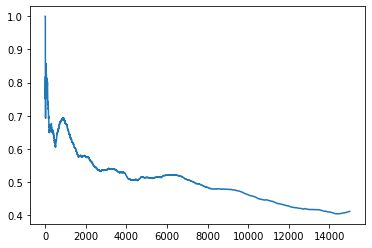

In [71]:
plt.plot(regretsEpsilon1)

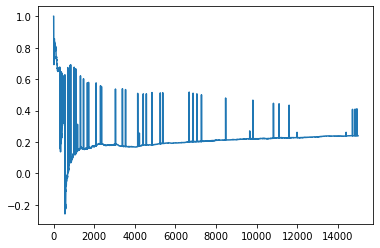

In [72]:
plt.plot(regretsEpsilon2)

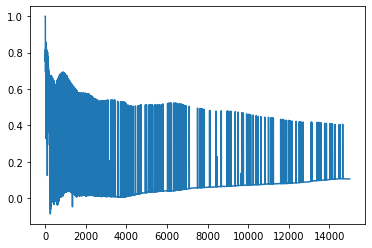

In [73]:
plt.plot(regretsEpsilon3)

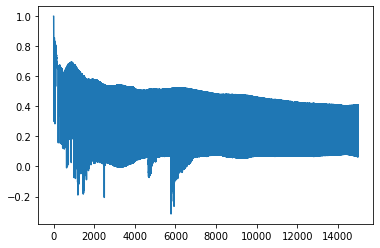

In [74]:
plt.plot(regretsEpsilon4)

Text(0.5, 1.02, 'effect of changing epsilon on regret')

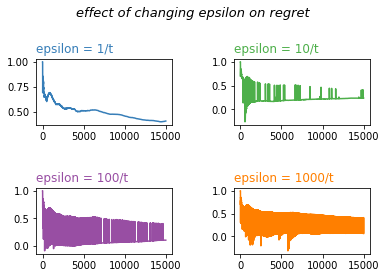

In [75]:
regrets = np.zeros((4, regretsEpsilon1.shape[0]))
regrets[0] = regretsEpsilon1
regrets[1] = regretsEpsilon2
regrets[2] = regretsEpsilon3
regrets[3] = regretsEpsilon4
lebels = ["epsilon = 1/t", "epsilon = 10/t", "epsilon = 100/t", "epsilon = 1000/t"]
palette = plt.get_cmap('Set1')
for num in range(1,5):
  plt.subplot(2,2, num)
  plt.plot(regrets[num-1], color=palette(num), label = lebels[num-1])
  plt.title(lebels[num-1], loc='left', fontsize=12, fontweight=0, color=palette(num))
  plt.tight_layout(pad=3.0)
plt.suptitle("effect of changing epsilon on regret", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)


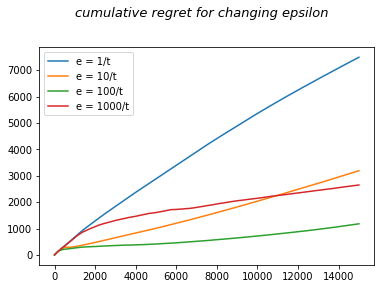

In [76]:
plt.plot(np.cumsum(regretsEpsilon1), label = "e = 1/t")
plt.plot(np.cumsum(regretsEpsilon2), label = "e = 10/t")
plt.plot(np.cumsum(regretsEpsilon3), label = "e = 100/t")
plt.plot(np.cumsum(regretsEpsilon4), label = "e = 1000/t")
plt.legend()
plt.suptitle("cumulative regret for changing epsilon", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
plt.show()

Text(0, 0.5, 'Variant')

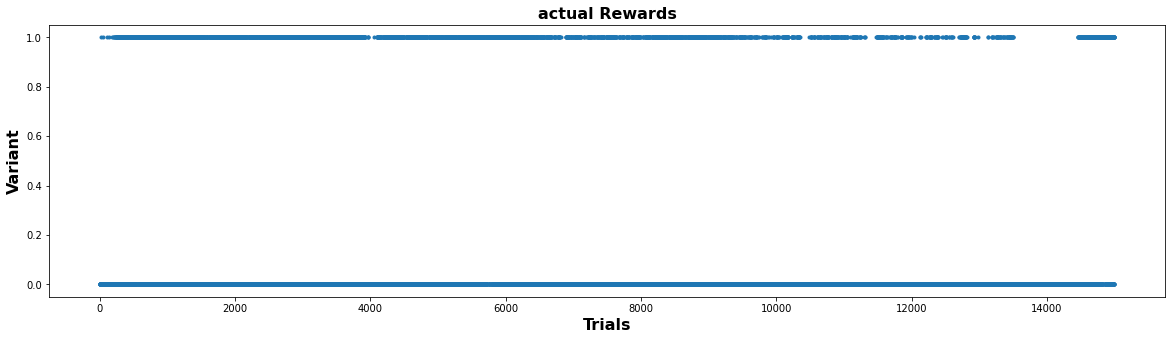

In [77]:
cmap = plt.get_cmap("tab10", 3)
plt.figure(figsize=(20,5))
plt.scatter(x_ax,actualRewardsEpsilon3, cmap=cmap, marker=".", alpha=1)
plt.title("actual Rewards", fontsize=16, fontweight="bold")
plt.xlabel("Trials", fontsize=16, fontweight="bold")
plt.ylabel("Variant", fontsize=16, fontweight="bold")



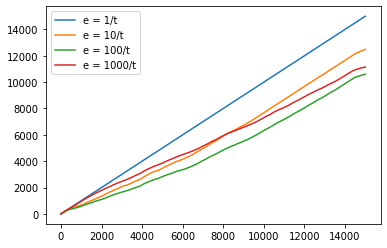

In [78]:
losses1 = np.cumsum(np.ones(recommendationMoviesDf.shape[1]) - actualRewardsEpsilon1)
losses2 = np.cumsum(np.ones(recommendationMoviesDf.shape[1]) - actualRewardsEpsilon2)
losses3 = np.cumsum(np.ones(recommendationMoviesDf.shape[1]) - actualRewardsEpsilon3)
losses4 = np.cumsum(np.ones(recommendationMoviesDf.shape[1]) - actualRewardsEpsilon4)

plt.plot(losses1, label = "e = 1/t")
plt.plot(losses2, label = "e = 10/t")
plt.plot(losses3, label = "e = 100/t")
plt.plot(losses4, label = "e = 1000/t")
plt.legend()

In [79]:
print(np.sum(actualRewardsEpsilon3))

4402.0


In [80]:
print(np.sum(regretsEpsilon3))

1180.1411497118402


###UCB1

In [0]:
def UCB1(numArms, numTrials, dataFrame):
  actualRewards = np.zeros((numTrials))
  expectedPartialRewards = np.zeros((numArms))
  expectedFullRewards = np.zeros((numArms))
  selectionFrequency = np.zeros((numArms))
  

  regrets = np.zeros((numTrials))
 
  # 0 - > k trials
  for k in range(numArms):
    expectedPartialRewards[k] = dataFrame.iloc[k,k] 
    expectedFullRewards += (dataFrame[k].to_numpy() - expectedFullRewards)/(k+1)
    actualRewards[k] = dataFrame.iloc[k,k]
    selectionFrequency[k]+=1
    

  # print(np.sum(expectedRewardsForArms)) 53
  # print(np.sum(actualRewards)) 53
  # print(np.sum(selectionFrequencyForArms)) 1004

  # k -> T trials
  print("numTrials", numTrials)
  print("numTrials - numArms", numTrials - numArms)

  for t in range(numArms+1, numTrials):
    explorationTermForArms = np.sqrt(np.ones(numArms)*2*np.log(t)/selectionFrequency)
    UCB = expectedPartialRewards + explorationTermForArms
    
    winners = np.argwhere(UCB == np.amax(UCB))
    # armSelectedIndex =  np.argmax(expectedRewardsForArms[winners])
    val = random.randint(0,len(winners)-1)
    armSelectedIndex = winners[val]
    # armSelectedIndex = np.argmax(UCB)
    
    actualRewards[t] = dataFrame.iloc[armSelectedIndex, t]
    selectionFrequency[armSelectedIndex] +=1
    expectedPartialRewards[armSelectedIndex] += (actualRewards[t] - expectedPartialRewards[armSelectedIndex])/selectionFrequency[armSelectedIndex]
    expectedFullRewards += (dataFrame[t].to_numpy() - expectedFullRewards)/(t+1)
    regrets[t] = calculateInstantaneuosRegret(expectedFullRewards,  expectedPartialRewards, armSelectedIndex)
  
  return actualRewards, regrets

In [82]:
actualRewardsUCB, regretsUCB = UCB1(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf)

numTrials 14999
numTrials - numArms 13994


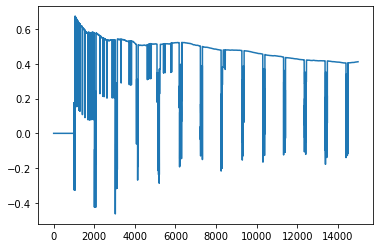

In [83]:
plt.plot(regretsUCB)
# plt.plot(regretsEpsilon3)

Text(0, 0.5, 'cumulative')

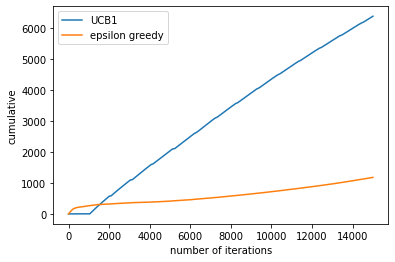

In [84]:
plt.plot(np.cumsum(regretsUCB), label = "UCB1")
plt.plot(np.cumsum(regretsEpsilon3), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("cumulative")

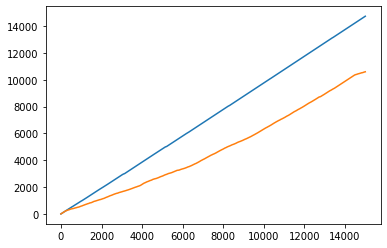

In [85]:
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsUCB))
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsEpsilon3))

Text(0, 0.5, 'Variant')

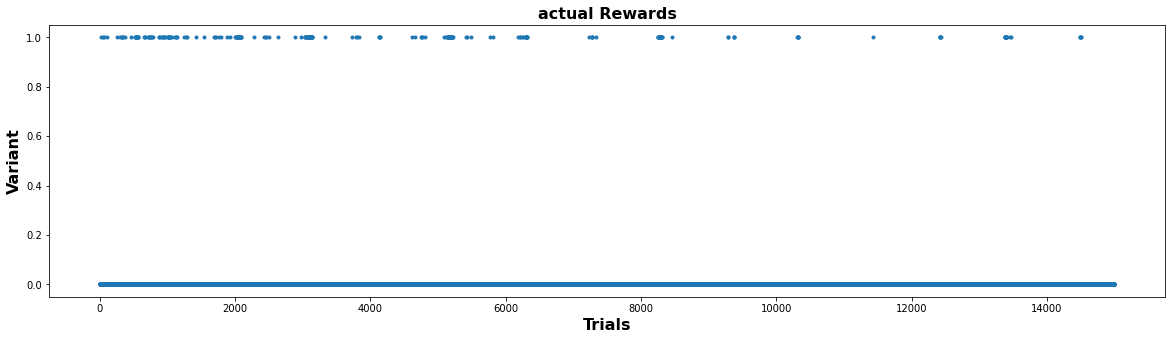

In [86]:
cmap = plt.get_cmap("tab10", 3)
plt.figure(figsize=(20,5))
plt.scatter(x_ax,actualRewardsUCB, cmap=cmap, marker=".", alpha=1)
# plt.scatter(x_ax, actualRewardsEpsilon2, cmap = cmap, marker = "+", alpha = 0.2)
plt.title("actual Rewards", fontsize=16, fontweight="bold")
plt.xlabel("Trials", fontsize=16, fontweight="bold")
plt.ylabel("Variant", fontsize=16, fontweight="bold")


In [87]:
print(np.sum(actualRewardsUCB))

262.0


In [88]:
print(np.sum(regretsUCB))

6392.178153364497


###Thompson Sampling


In [0]:
def ThomsonSampling(numArms, numTrials, dataFrame):
  actualRewards = np.zeros(numTrials)
  S = np.zeros(numArms)
  F = np.zeros(numArms)
  expectedPartialRewards = np.zeros((numArms))
  selectionFrequency = np.ones((numArms))
  positiveRewardFrequency = np.zeros((numArms))
  expectedFullRewards = np.zeros((numArms))
  regrets = np.zeros(numTrials)
  for i in range(numTrials):
    theta = np.random.beta(S+1,F+1)
    selectedArmIndex = np.argmax(theta)
    actualRewards[i] = dataFrame.iloc[selectedArmIndex, i]
    if actualRewards[i] == 1.0:
      S[selectedArmIndex]+=1
      positiveRewardFrequency[selectedArmIndex]+=1
    else:
      F[selectedArmIndex]+=1  
    selectionFrequency[selectedArmIndex]+=1
    expectedPartialRewards = (positiveRewardFrequency/ selectionFrequency)
    expectedFullRewards += (dataFrame[i].to_numpy() - expectedFullRewards)/(i+1)
    regrets[i] = calculateInstantaneuosRegret(expectedFullRewards, expectedPartialRewards, selectedArmIndex)
  return actualRewards, regrets
    

In [0]:
actualRewardsThompson, regretsThompson = ThomsonSampling(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf)

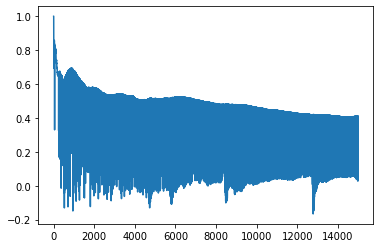

In [91]:
plt.plot(regretsThompson)

Text(0, 0.5, 'cumulative')

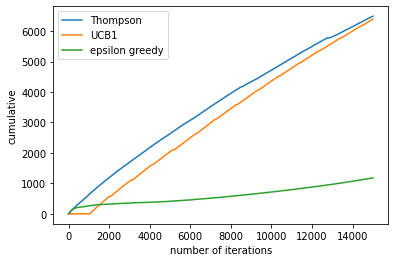

In [92]:

plt.plot(np.cumsum(regretsThompson), label = "Thompson")
plt.plot(np.cumsum(regretsUCB), label = "UCB1")
plt.plot(np.cumsum(regretsEpsilon3), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")

plt.ylabel("cumulative")

Text(0, 0.5, 'cumulative loss over iterations')

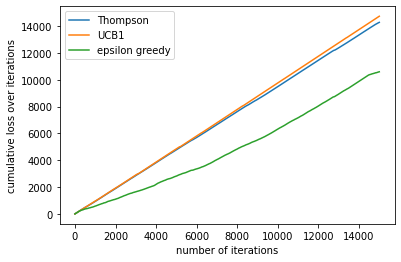

In [93]:
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsThompson), label = "Thompson")
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsUCB), label = "UCB1")
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsEpsilon3), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("cumulative loss over iterations")

Text(0, 0.5, 'Variant')

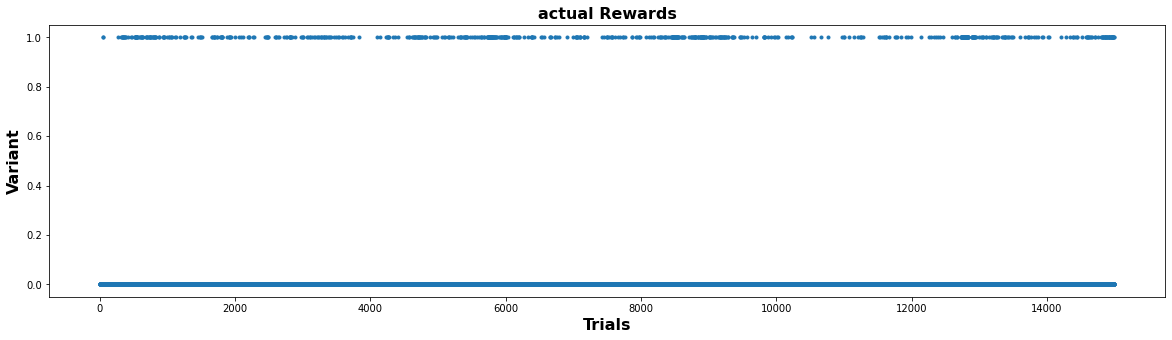

In [94]:
cmap = plt.get_cmap("tab10", 3)
plt.figure(figsize=(20,5))
plt.scatter(x_ax,actualRewardsThompson, cmap=cmap, marker=".", alpha=1)
# plt.scatter(x_ax, actualRewardsEpsilon2, cmap = cmap, marker = "+", alpha = 0.2)
plt.title("actual Rewards", fontsize=16, fontweight="bold")
plt.xlabel("Trials", fontsize=16, fontweight="bold")
plt.ylabel("Variant", fontsize=16, fontweight="bold")


In [95]:
print(np.sum(actualRewardsThompson))

718.0


In [96]:
print(np.sum(regretsThompson))

6485.165546003678


##**Full Feedback**

###Epsilon Greedy



In [0]:
def epsilonGreedyFull(numArms, numTrials, dataFrame, epsilonMult = 100): 
  expectedFullRewards = np.zeros(numArms)
  actualRewards = np.zeros(numTrials)
  regrets = np.zeros(numTrials)
  explr = 0
  explt = 0
  for trialIter in range(numTrials):
    epsilon = (epsilonMult /(trialIter+1))
    r = random.random()
    # print(r, epsilon)
    if(r<epsilon):
      # print("explore")
      explr+=1
      selectedArmIndex = np.random.randint(0,numArms,1)
    else:
      # print("exploit")
      explt+=1
      selectedArmIndex = np.argmax(expectedFullRewards)
    
    actualRewards[trialIter] = dataFrame.iloc[selectedArmIndex, trialIter]
    # if(actualRewards[trialIter] == 1.0):
    #     positiveRewardFrequencyForArms[selectedArmIndex]+=1
    # selectionFrequencyForArms[selectedArmIndex]+=1

    expectedFullRewards  +=(dataFrame[trialIter].to_numpy() - expectedFullRewards)/ (trialIter+1)
    # print("expected full res", expectedFullRewards)

    # expectedPartialRewards = (positiveRewardFrequencyForArms/ selectionFrequencyForArms)
    regrets[trialIter] = calculateInstantaneuosRegret(expectedFullRewards, expectedFullRewards, selectedArmIndex)
    # print(regrets[trialIter], np.sum(expectedFullRewards), np.sum(expectedPartialRewards))
    # if(trialIter == 2):
      # break
  # print("explr", explr, "Explt", explt)
  # print(regrets)
  # print("------------------------------")
  return actualRewards, regrets


In [0]:
actualRewardsEpsilonFull1, regretsEpsilonFull1 = epsilonGreedyFull(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf, 1)
actualRewardsEpsilonFull2, regretsEpsilonFull2 = epsilonGreedyFull(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf, 10)
actualRewardsEpsilonFull3, regretsEpsilonFull3 = epsilonGreedyFull(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf, 100)
actualRewardsEpsilonFull4, regretsEpsilonFull4 = epsilonGreedyFull(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf, 1000)

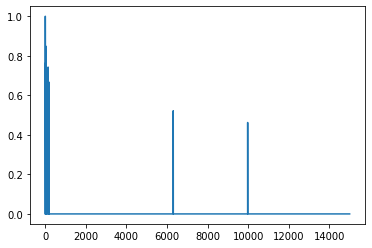

In [42]:
plt.plot(regretsEpsilonFull1)

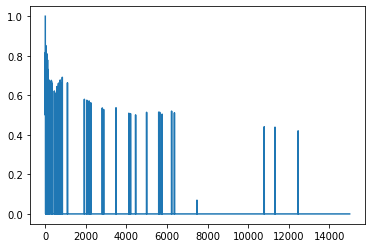

In [43]:
plt.plot(regretsEpsilonFull2)

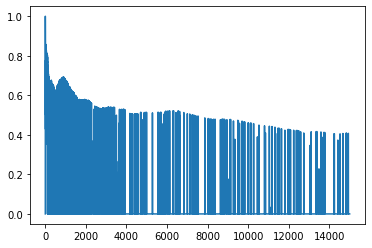

In [44]:
plt.plot(regretsEpsilonFull3)

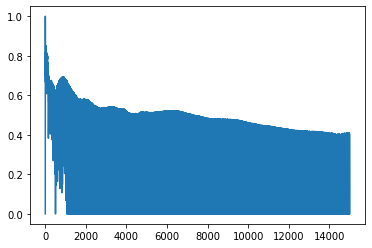

In [45]:
plt.plot(regretsEpsilonFull4)

Text(0.5, 1.02, 'effect of changing epsilon on regret')

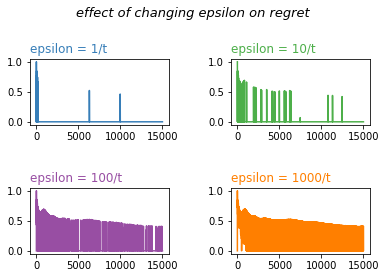

In [46]:
regretsFull = np.zeros((4, regretsEpsilonFull1.shape[0]))
regretsFull[0] = regretsEpsilonFull1
regretsFull[1] = regretsEpsilonFull2
regretsFull[2] = regretsEpsilonFull3
regretsFull[3] = regretsEpsilonFull4
lebels = ["epsilon = 1/t", "epsilon = 10/t", "epsilon = 100/t", "epsilon = 1000/t"]
palette = plt.get_cmap('Set1')
for num in range(1,5):
  plt.subplot(2,2, num)
  plt.plot(regretsFull[num-1], color=palette(num), label = lebels[num-1])
  plt.title(lebels[num-1], loc='left', fontsize=12, fontweight=0, color=palette(num))
  plt.tight_layout(pad=3.0)
plt.suptitle("effect of changing epsilon on regret", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)


Text(0, 0.5, 'cumulative')

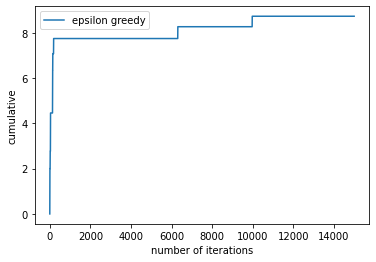

In [47]:
plt.plot(np.cumsum(regretsEpsilonFull1), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("cumulative")

Text(0, 0.5, 'cumulative')

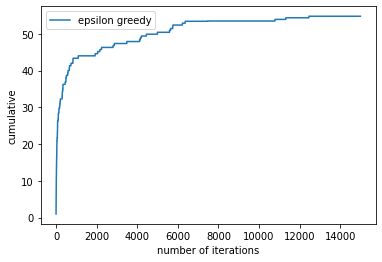

In [48]:
plt.plot(np.cumsum(regretsEpsilonFull2), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("cumulative")

Text(0, 0.5, 'cumulative')

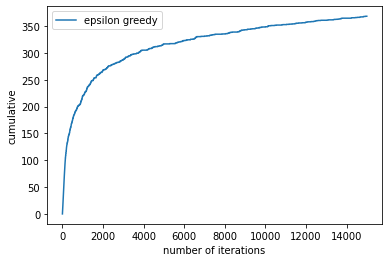

In [49]:
plt.plot(np.cumsum(regretsEpsilonFull3), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("cumulative")

Text(0, 0.5, 'cumulative')

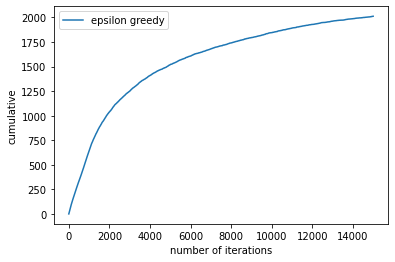

In [50]:
plt.plot(np.cumsum(regretsEpsilonFull4), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("cumulative")

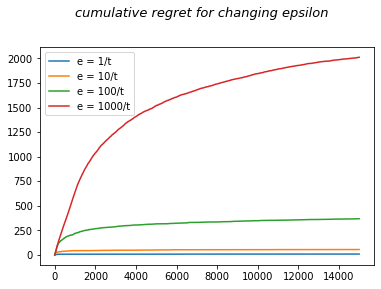

In [51]:
plt.plot(np.cumsum(regretsEpsilonFull1), label = "e = 1/t")
plt.plot(np.cumsum(regretsEpsilonFull2), label = "e = 10/t")
plt.plot(np.cumsum(regretsEpsilonFull3), label = "e = 100/t")
plt.plot(np.cumsum(regretsEpsilonFull4), label = "e = 1000/t")
plt.legend()
plt.suptitle("cumulative regret for changing epsilon", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
plt.show()

Text(0, 0.5, 'Variant')

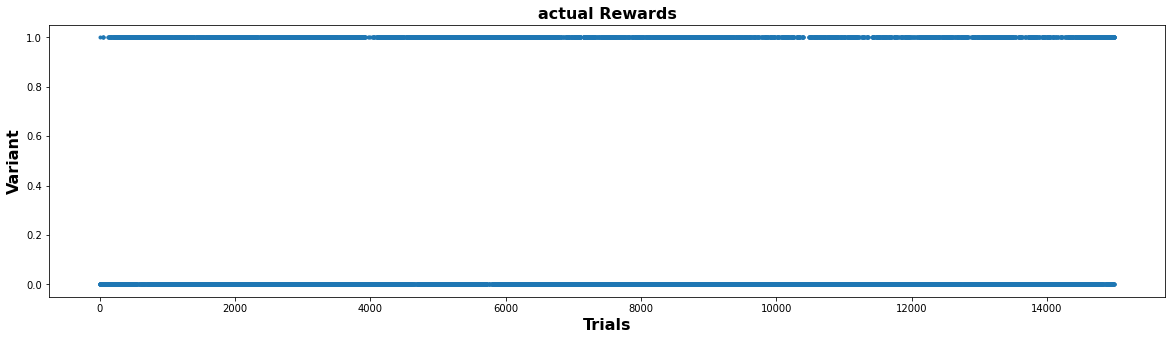

In [52]:
x_ax = np.arange(recommendationMoviesDf.shape[1])
cmap = plt.get_cmap("tab10", 3)
plt.figure(figsize=(20,5))
plt.scatter(x_ax,actualRewardsEpsilonFull3, cmap=cmap, marker=".", alpha=1)
plt.title("actual Rewards", fontsize=16, fontweight="bold")
plt.xlabel("Trials", fontsize=16, fontweight="bold")
plt.ylabel("Variant", fontsize=16, fontweight="bold")



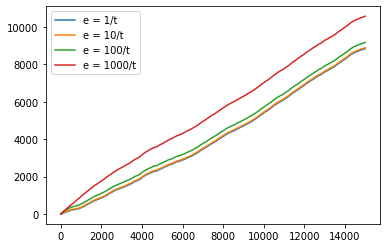

In [53]:
lossesFull1 = np.cumsum(np.ones(recommendationMoviesDf.shape[1]) - actualRewardsEpsilonFull1)
lossesFull2 = np.cumsum(np.ones(recommendationMoviesDf.shape[1]) - actualRewardsEpsilonFull2)
lossesFull3 = np.cumsum(np.ones(recommendationMoviesDf.shape[1]) - actualRewardsEpsilonFull3)
lossesFull4 = np.cumsum(np.ones(recommendationMoviesDf.shape[1]) - actualRewardsEpsilonFull4)

plt.plot(lossesFull1, label = "e = 1/t")
plt.plot(lossesFull2, label = "e = 10/t")
plt.plot(lossesFull3, label = "e = 100/t")
plt.plot(lossesFull4, label = "e = 1000/t")
plt.legend()

In [54]:
print(np.sum(actualRewardsEpsilonFull3))

5837.0


In [55]:
print(np.sum(regretsEpsilonFull3))

368.3474478081031


###UCB1



In [0]:
def UCB1Full(numArms, numTrials, dataFrame):
  actualRewards = np.zeros((numTrials))
  expectedFullRewards = np.zeros((numArms))
  selectionFrequency = np.zeros((numArms))
  regrets = np.zeros((numTrials))
 
  for k in range(numArms):
    expectedFullRewards += (dataFrame[k].to_numpy() - expectedFullRewards)/(k+1)
    actualRewards[k] = dataFrame.iloc[k,k]
    selectionFrequency[k]+=1
    regrets[k] = calculateInstantaneuosRegret(expectedFullRewards,  expectedFullRewards, k)

  for t in range(numArms+1, numTrials):
    explorationTermForArms = np.sqrt(np.ones(numArms)*2*np.log(t)/selectionFrequency)
    UCB = expectedFullRewards + explorationTermForArms
    
    winners = np.argwhere(UCB == np.amax(UCB))
    # armSelectedIndex =  np.argmax(expectedRewardsForArms[winners])
    val = random.randint(0,len(winners)-1)
    armSelectedIndex = winners[val]
    # armSelectedIndex = np.argmax(UCB)
    # print("t:", t, "selection freq", selection)
    actualRewards[t] = dataFrame.iloc[armSelectedIndex, t]
    selectionFrequency +=1
    expectedFullRewards += (dataFrame[t].to_numpy() - expectedFullRewards)/(t+1)
    regrets[t] = calculateInstantaneuosRegret(expectedFullRewards,  expectedFullRewards, armSelectedIndex)
  
  return actualRewards, regrets

In [0]:
actualRewardsUCBFull, regretsUCBFull = UCB1Full(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf)

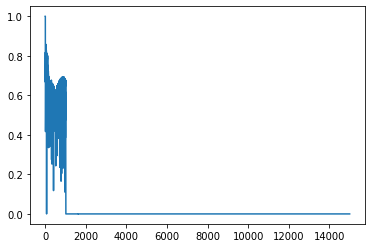

In [122]:
plt.plot(regretsUCBFull)

Text(0, 0.5, 'cumulative')

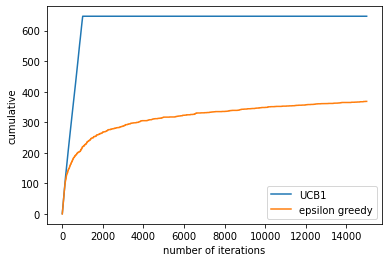

In [123]:
plt.plot(np.cumsum(regretsUCBFull), label = "UCB1")
plt.plot(np.cumsum(regretsEpsilonFull3), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("cumulative")

In [125]:
np.sum(regretsUCBFull)

646.9970918360648

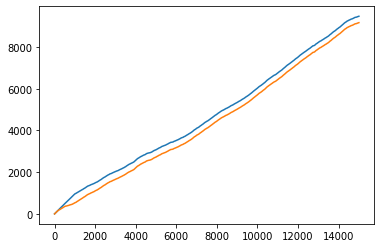

In [126]:
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsUCBFull))
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsEpsilonFull3))

Text(0, 0.5, 'Variant')

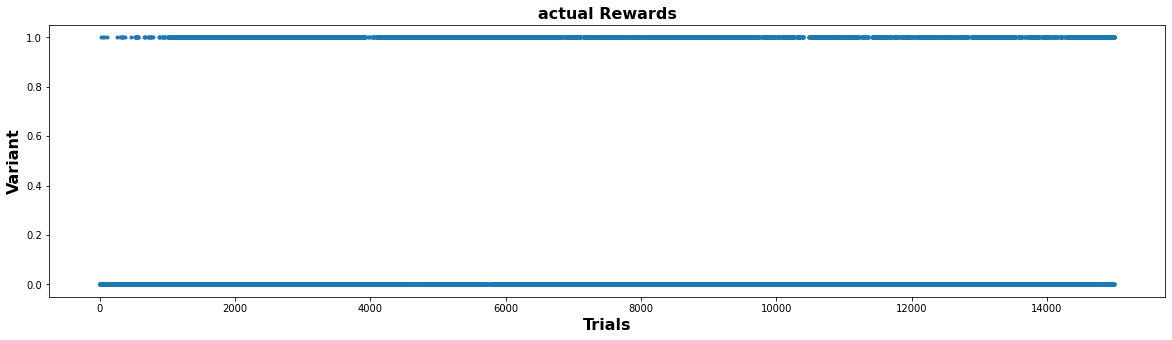

In [127]:
cmap = plt.get_cmap("tab10", 3)
plt.figure(figsize=(20,5))
plt.scatter(x_ax,actualRewardsUCBFull, cmap=cmap, marker=".", alpha=1)
# plt.scatter(x_ax, actualRewardsEpsilon2, cmap = cmap, marker = "+", alpha = 0.2)
plt.title("actual Rewards", fontsize=16, fontweight="bold")
plt.xlabel("Trials", fontsize=16, fontweight="bold")
plt.ylabel("Variant", fontsize=16, fontweight="bold")


###Thompson Sampling


In [0]:
def ThomsonSamplingFull(numArms, numTrials, dataFrame):
  actualRewards = np.zeros(numTrials)
  S = np.zeros(numArms)
  F = np.zeros(numArms)
  expectedFullRewards = np.zeros((numArms))
  regrets = np.zeros(numTrials)
  for i in range(numTrials):
    theta = np.random.beta(S+1,F+1)
    selectedArmIndex = np.argmax(theta)
    actualRewards[i] = dataFrame.iloc[selectedArmIndex, i]
    actualValues = dataFrame[i].to_numpy()
    S[actualValues ==1.0] +=1
    F[actualValues ==0.0]+=1
    expectedFullRewards += (actualValues - expectedFullRewards)/(i+1)
    regrets[i] = calculateInstantaneuosRegret(expectedFullRewards, expectedFullRewards, selectedArmIndex)
  return actualRewards, regrets
    

In [0]:
actualRewardsThompsonFull, regretsThompsonFull = ThomsonSamplingFull(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf)

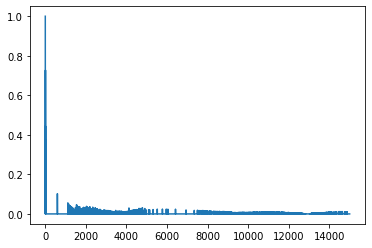

In [132]:
plt.plot(regretsThompsonFull)

Text(0, 0.5, 'cumulative')

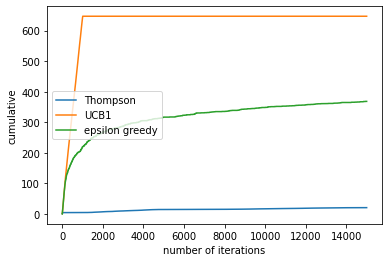

In [133]:

plt.plot(np.cumsum(regretsThompsonFull), label = "Thompson")
plt.plot(np.cumsum(regretsUCBFull), label = "UCB1")
plt.plot(np.cumsum(regretsEpsilonFull3), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")

plt.ylabel("cumulative")

Text(0, 0.5, 'cumulative loss over iterations')

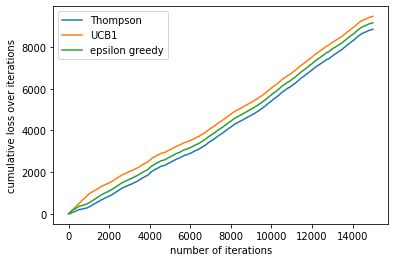

In [134]:
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsThompsonFull), label = "Thompson")
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsUCBFull), label = "UCB1")
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsEpsilonFull3), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("cumulative loss over iterations")

Text(0, 0.5, 'Variant')

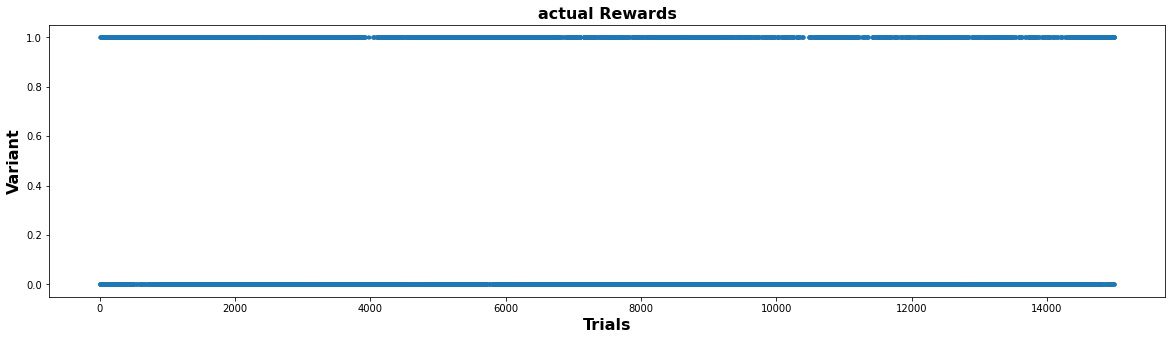

In [135]:
cmap = plt.get_cmap("tab10", 3)
plt.figure(figsize=(20,5))
plt.scatter(x_ax,actualRewardsThompsonFull, cmap=cmap, marker=".", alpha=1)
# plt.scatter(x_ax, actualRewardsEpsilon2, cmap = cmap, marker = "+", alpha = 0.2)
plt.title("actual Rewards", fontsize=16, fontweight="bold")
plt.xlabel("Trials", fontsize=16, fontweight="bold")
plt.ylabel("Variant", fontsize=16, fontweight="bold")


In [136]:
print(np.sum(actualRewardsThompsonFull))

6153.0


In [137]:
print(np.sum(regretsThompsonFull))

20.5246737918822


In [0]:
# Mia - problem 2: partial-feedback + stochastic algorithm -> multiplication weights algorithm
def exp3(dataFrame):
  dataFrame = np.array(dataFrame)
  k = dataFrame.shape[0]
  T = dataFrame.shape[1]
  t = np.arange(1,T+1)
  t = np.sqrt(1/t)
  eta = (np.sqrt(np.log(k) / k))*t
  p_t = np.full((k), 1/k)
  L_t = np.zeros(k)
  L_accu = np.zeros(k)
  total_reward = 0
  regret_arr = []
  actual_loss = 0
  best_loss = 0
  diff_loss = 0

  for t in range(T): 
    arm_i = np.random.choice(k,1,p=p_t)[0]
    L_accu += 1 - dataFrame[:,t]

    cur_reward = dataFrame[arm_i,t]
    total_reward += cur_reward

    best_arm = np.argmin(L_accu)
    actual_loss += 1 - dataFrame[arm_i,t]
    best_loss = L_accu[best_arm]

    diff_loss = actual_loss - best_loss
    regret_arr.append(diff_loss / (t+1))


    l_it_hat = (1 - dataFrame[arm_i,t])/p_t[arm_i]
    L_t[arm_i] += l_it_hat
    temp = np.exp(-eta[t] * np.array(L_t))
    p_t = temp / np.sum(temp)

  return regret_arr, total_reward


In [0]:
regret_arr, total_reward = exp3(recommendationMoviesDf)

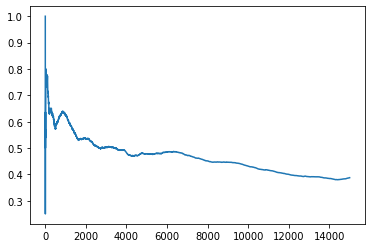

In [0]:
plt.plot(regret_arr)

In [0]:
# Mia - problem 3: full-feedback algorithm -> multiplication weights algorithm
def multiplication_weights(dataFrame):
  dataFrame = np.array(dataFrame)
  k = dataFrame.shape[0]
  T = dataFrame.shape[1]
  eta = 1 / np.sqrt(T)
  p_t = np.zeros(k)
  w = np.ones(k)
  L_t = np.zeros(k)
  total_reward = 0
  reward = np.zeros(k)
  regret_arr = []
  actual_loss = 0
  best_loss = 0
  diff_loss = 0
  
  for t in range(T): 
    p_t = w / np.sum(w)
    arm_i = np.random.choice(k,1,p=p_t)[0]
    L_t += 1 - dataFrame[:,t]

    cur_reward = dataFrame[arm_i,t]
    total_reward += cur_reward

    best_arm = np.argmin(L_t)
    actual_loss += 1 - dataFrame[arm_i,t]
    best_loss = L_t[best_arm]
    diff_loss = actual_loss - best_loss
    regret_arr.append(diff_loss / (t+1))

    L = 1 - dataFrame[:,t] 
    w = w*(1-eta*np.array(L))

  return regret_arr, total_reward



In [0]:
regret_arr, total_reward = multiplication_weights(recommendationMoviesDf)

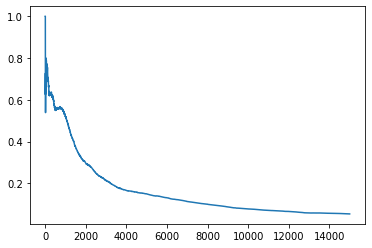

In [0]:
plt.plot(regret_arr)